# EE915: Week-7 - Project-7 - LDA PIMA Indians Diabetes Prediction
**Name**: Venkateswar Reddy Melachervu </br>
**Roll No.**: 23156022 </br>
**Email**: vmela23@iitk.ac.in </br>
**Dataset**: PIMA Indians Diabetes Dataset </br>
**Professor**: Prof. Aditya K. Jagganatham </br>
**TAs**: Meesam and Priyanka </br>

This project uses LDA technique and QDA to perform clustering on the given diabetes dataset.

&copy; Venkateswar Reddy Melachervu 2024. All rights reserved.

In [ ]:
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib

In [10]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates

In [2]:
# Define roll number, name, email and  load the diabetes dataset
roll_number = "23156022" 
name = "Venkateswar Reddy Melachervu"
email = "vmela23@iitk.ac.in"

DiabetesData = pd.read_csv('pima_indians_diabetes_dataset.csv')

X = DiabetesData.iloc[:, [0, 7]].values
Y = DiabetesData.iloc[:, 8].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

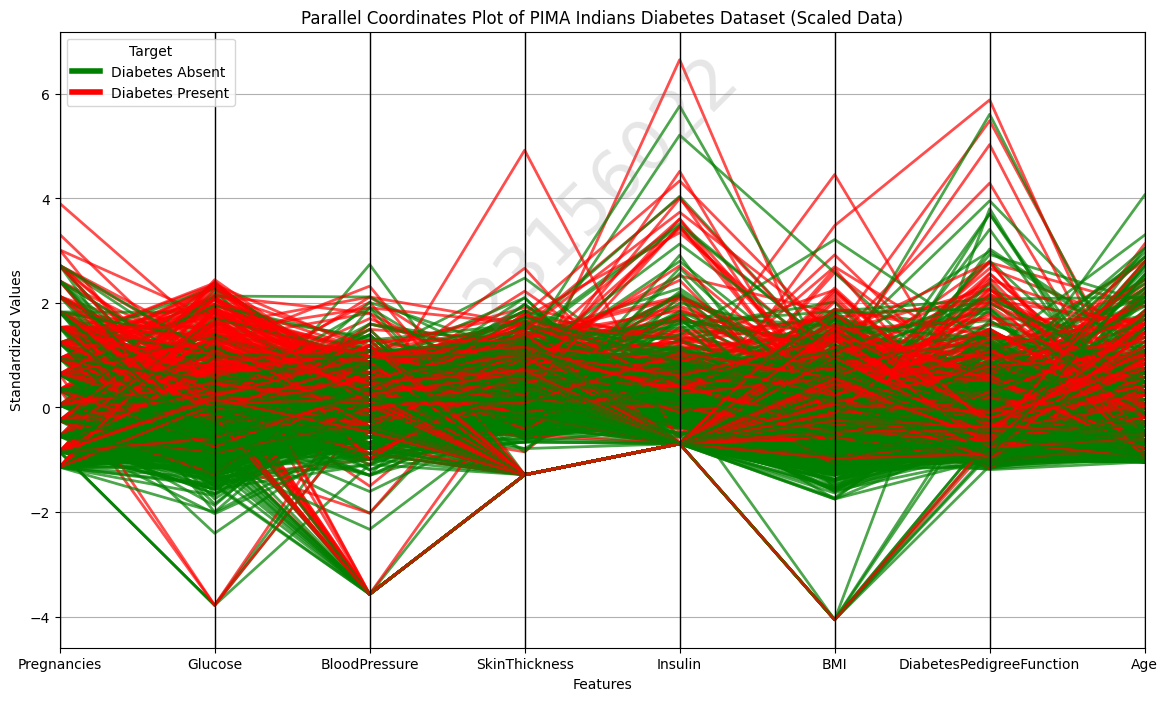

In [13]:
# Plot original scaled data - parallel coordinates

# Load and preprocess the diabetes dataset
DiabetesData = pd.read_csv('pima_indians_diabetes_dataset.csv')

# Separate features and target
X = DiabetesData.iloc[:, :-1].values
Y = DiabetesData.iloc[:, -1].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled data
df_scaled = pd.DataFrame(X_scaled, columns=DiabetesData.columns[:-1])
df_scaled['target'] = Y

# Define custom colors for the target
class_colors = {0: 'green', 1: 'red'}
colors = df_scaled['target'].map(class_colors)

# Plot the Parallel Coordinates
plt.figure(figsize=(14, 8))
parallel_coordinates(df_scaled, class_column='target', color=colors, linewidth=2, alpha=0.7)
plt.title('Parallel Coordinates Plot of PIMA Indians Diabetes Dataset (Scaled Data)')
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.grid(True)

# Add a legend for target classes
legend_labels = [
    plt.Line2D([0], [0], color='green', lw=4, label='Diabetes Absent'),
    plt.Line2D([0], [0], color='red', lw=4, label='Diabetes Present')
]
plt.legend(handles=legend_labels, title='Target', loc='upper left')

# Add centered diagonal watermark with roll number
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2, 
         rotation=45, ha='center', va='bottom', transform=plt.gca().transAxes)

# Show the plot
plt.show()


In [14]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=5)
print("Training data shape/size:", X_train.shape)
print("Training label shape/size:", Y_train.shape)
print("Test data shape/size:", X_test.shape)
print("Test label shape/size:", Y_test.shape)

Training data shape/size: (614, 8)
Training label shape/size: (614,)
Test data shape/size: (154, 8)
Test label shape/size: (154,)


In [16]:
# Linear Discriminant Analysis classifier fitting
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
Y_pred = lda.predict(X_scaled)
lda_score = accuracy_score(Y_test,lda.predict(X_test))
print(f'Accuracy score of LDA classifier is: {100 * lda_score:.6f}%\n')

Accuracy score of LDA classifier is: 79.870130%



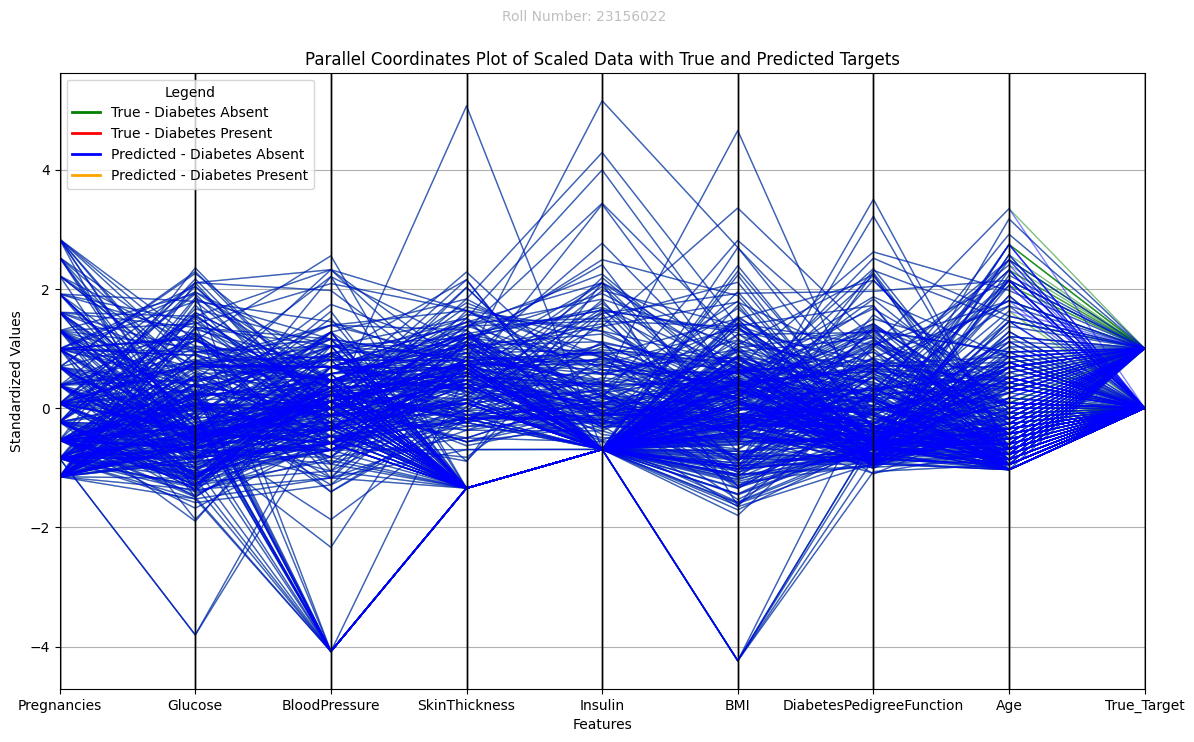

In [20]:
# Load the diabetes dataset
DiabetesData = pd.read_csv('pima_indians_diabetes_dataset.csv')

# Separate features and target
X = DiabetesData.iloc[:, :-1].values
Y = DiabetesData.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, Y_train)

# Predict using the test set
Y_pred = lda.predict(X_test_scaled)

# Combine the scaled data, true target, and predicted target into a DataFrame
df_test = pd.DataFrame(X_test_scaled, columns=DiabetesData.columns[:-1])
df_test['True_Target'] = Y_test
df_test['Predicted_Target'] = Y_pred

# Plotting the Parallel Coordinates
plt.figure(figsize=(14, 8))

# Plot for True Target
parallel_coordinates(df_test, class_column='True_Target', color=['green' if val == 0 else 'red' for val in df_test['True_Target']], linewidth=1, alpha=0.5)

# Overlay plot for Predicted Target
parallel_coordinates(df_test, class_column='Predicted_Target', color=['blue' if val == 0 else 'orange' for val in df_test['Predicted_Target']], linewidth=1, alpha=0.5)

plt.title('Parallel Coordinates Plot of Scaled Data with True and Predicted Targets')
plt.xlabel('Features')
plt.ylabel('Standardized Values')
plt.grid(True)

# Add a legend to distinguish between True and Predicted Targets
legend_labels = [
    plt.Line2D([0], [0], color='green', lw=2, label='True - Diabetes Absent'),
    plt.Line2D([0], [0], color='red', lw=2, label='True - Diabetes Present'),
    plt.Line2D([0], [0], color='blue', lw=2, label='Predicted - Diabetes Absent'),
    plt.Line2D([0], [0], color='orange', lw=2, label='Predicted - Diabetes Present')
]
plt.legend(handles=legend_labels, title='Legend', loc='upper left')

# Add watermark with roll number
plt.text(0.5, 0.95, f'Roll Number: {roll_number}', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=10, color='gray', alpha=0.5)

# Show the plot
plt.show()


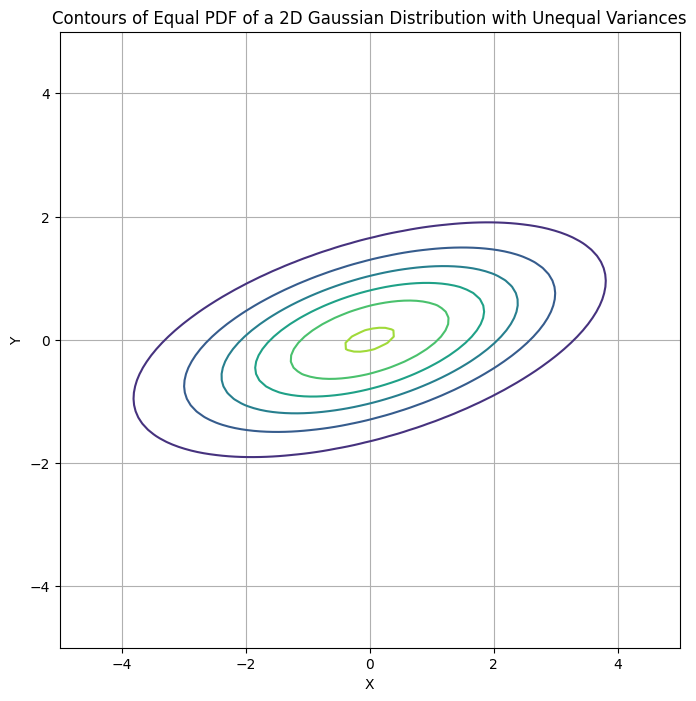

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the 2D Gaussian distribution
mu = np.array([0, 0])  # Mean
sigma_x = 2  # Standard deviation in x
sigma_y = 1  # Standard deviation in y
rho = 0.5  # Correlation coefficient

# Covariance matrix
Sigma = np.array([[sigma_x**2, rho*sigma_x*sigma_y],
                  [rho*sigma_x*sigma_y, sigma_y**2]])

# Generate grid points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the PDF of the Gaussian distribution
pos = np.dstack((X, Y))
Z = np.exp(-0.5 * np.einsum('...k,kl,...l->...', pos - mu, np.linalg.inv(Sigma), pos - mu))
Z = Z / (2 * np.pi * np.sqrt(np.linalg.det(Sigma)))

# Plot the contours of equal PDF
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, levels=6, cmap='viridis')
plt.title('Contours of Equal PDF of a 2D Gaussian Distribution with Unequal Variances')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
